In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import numpy as np
import polars.selectors as cs

In [2]:
df = pd.read_excel("../dano_base.xlsx")
df

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
0,0,3379c95477164e679ef80291a36a50ec,2023-03-05,772887927.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7c2512d6bf2d47fe91eefc75f8062698,2023-03-13,294312227.0,DCV,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ca547a88dd0c42f2a50657af01b87317,2023-03-03,815163498.0,DCV,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73707,73707,8168937fbe4c447ca420614d4e032d94,2023-03-14,380072334.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73708,73708,18de6aaefd9c478a9a2f7a04750e3d56,2023-03-21,941415613.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73709,73709,f03232cd563044f299b400a49ad95534,2023-03-03,863738223.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73710,73710,269435523adf4ec79361fa9fec903967,2023-03-09,956387021.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

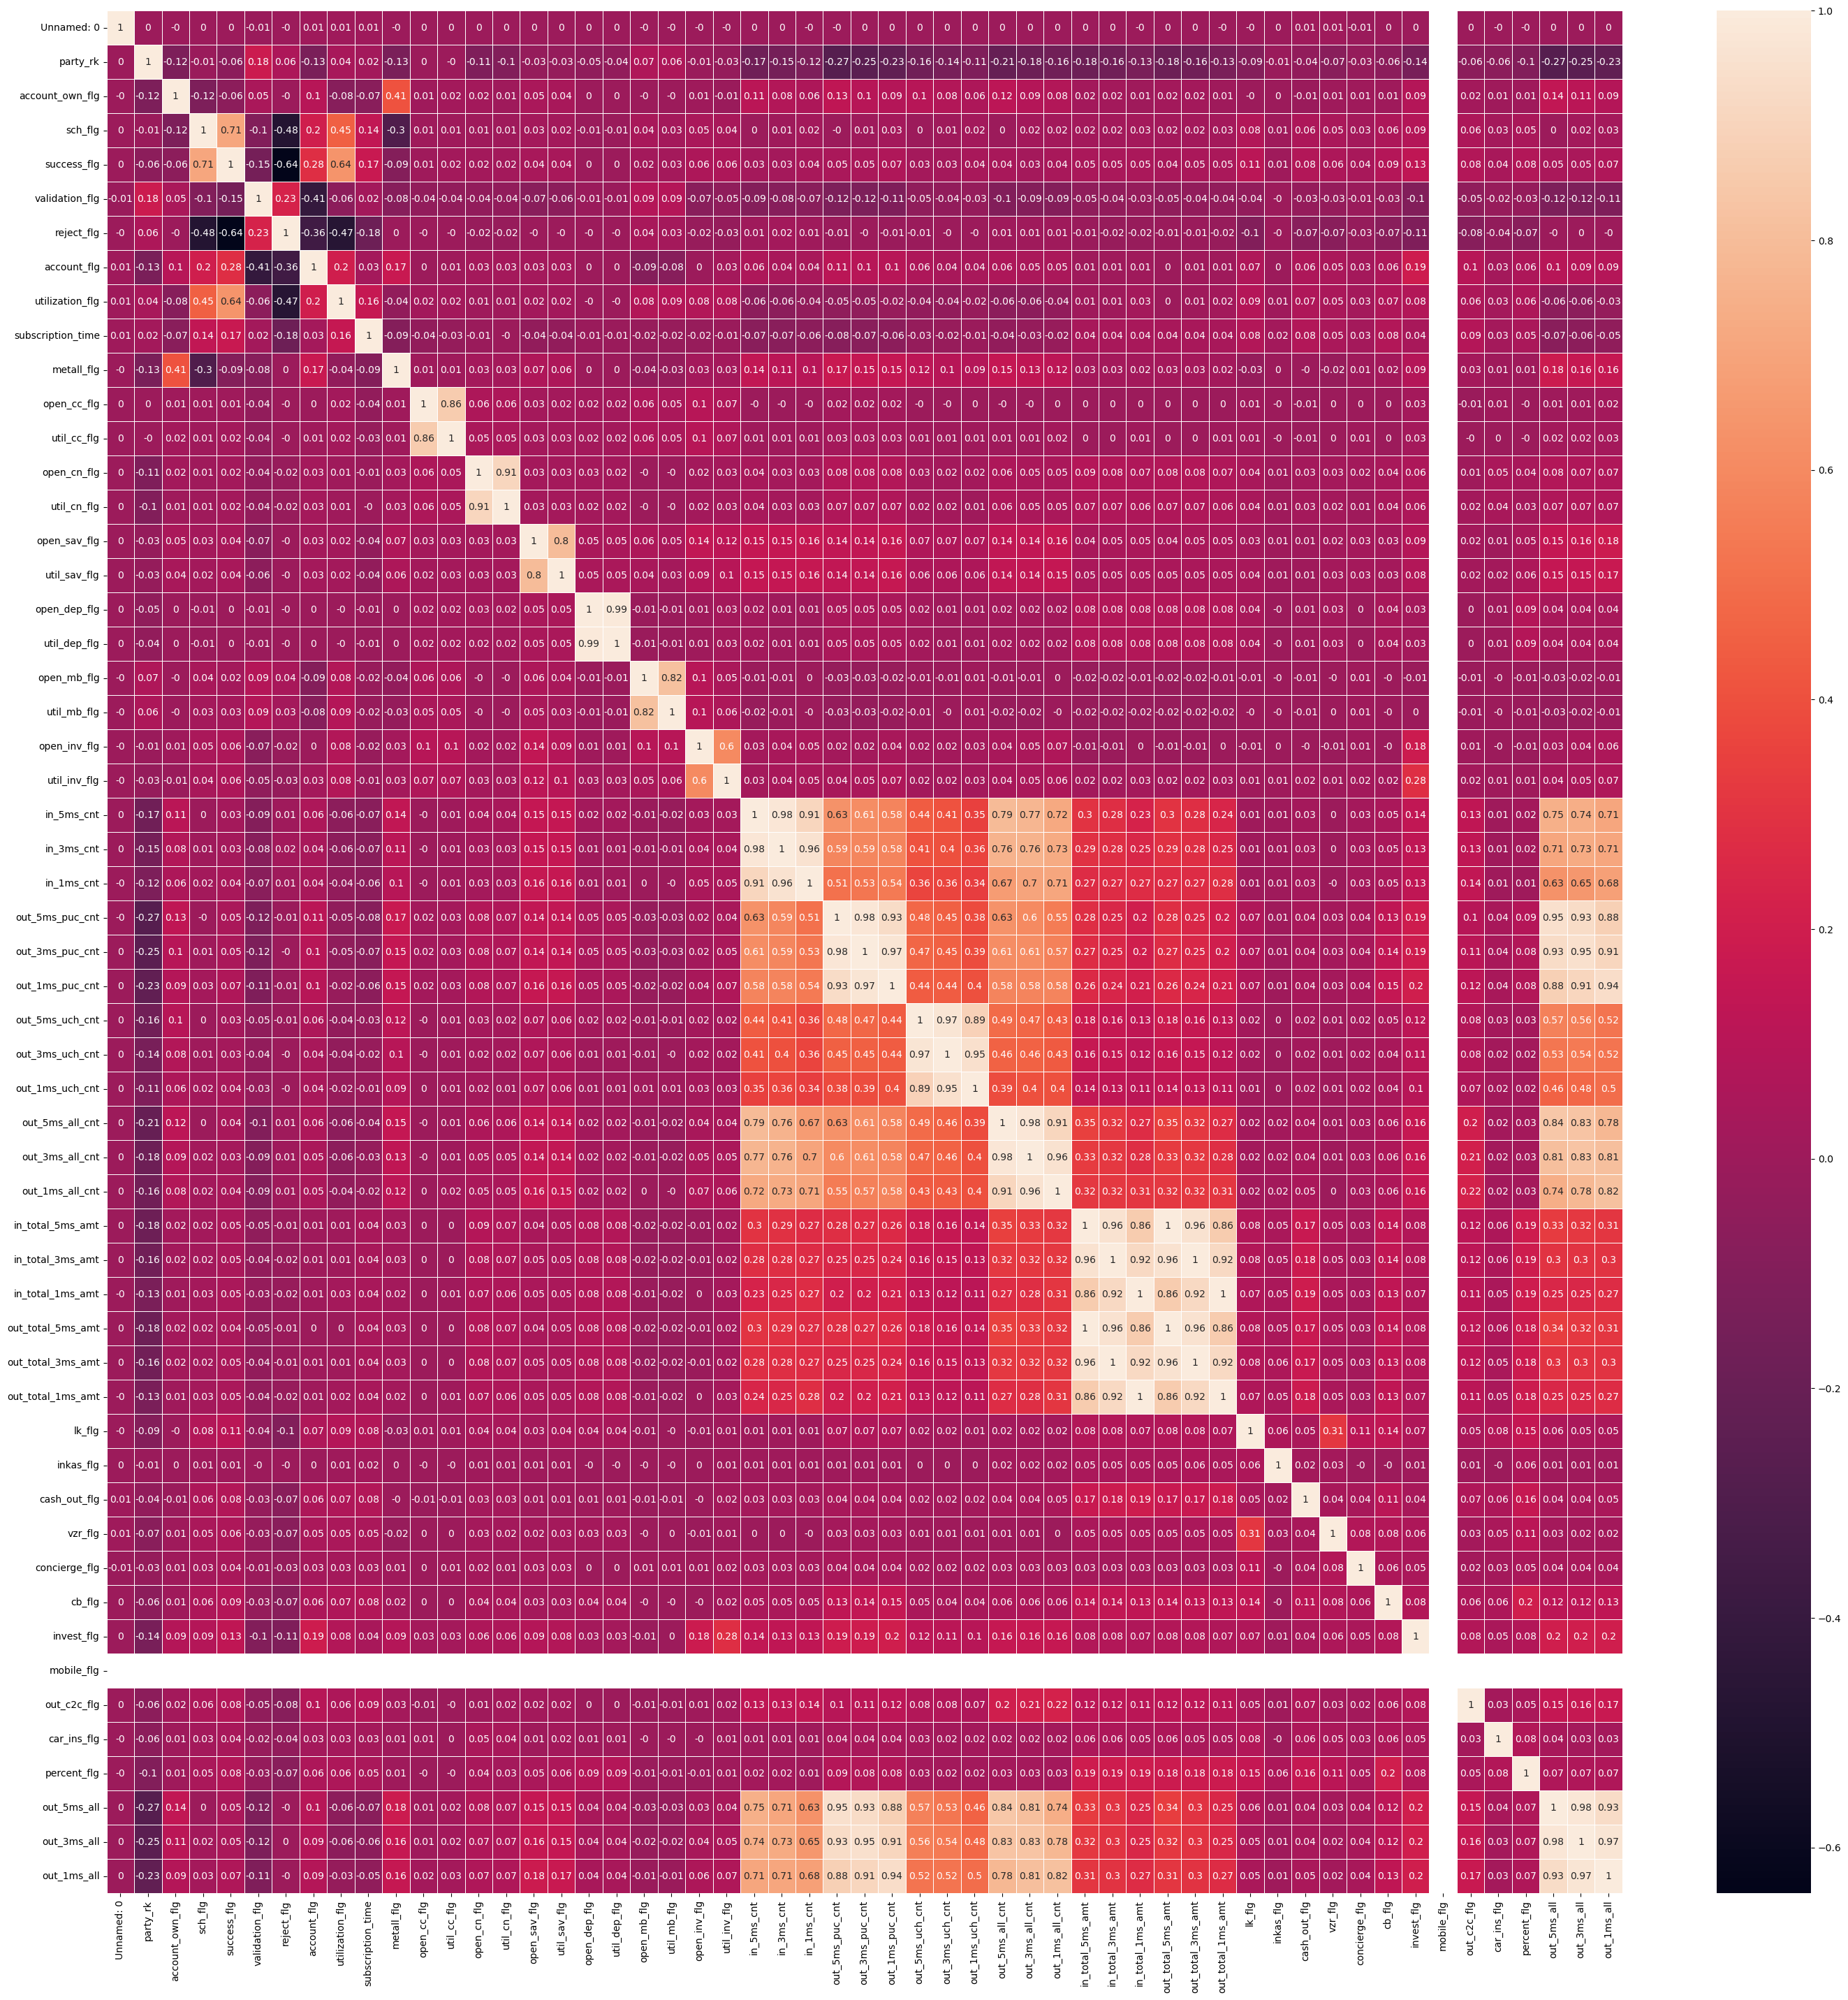

In [12]:
fig, ax = plt.subplots(figsize=(35, 35))  # Sample figsize in inches
sns.heatmap(
    pl.from_pandas(df)
    .with_columns(
        (
            pl.col("out_5ms_puc_cnt")
            + pl.col("out_5ms_uch_cnt")
            + pl.col("out_5ms_all_cnt")
        ).alias("out_5ms_all"),
        (
            pl.col("out_3ms_puc_cnt")
            + pl.col("out_3ms_uch_cnt")
            + pl.col("out_3ms_all_cnt")
        ).alias("out_3ms_all"),
        (
            pl.col("out_1ms_puc_cnt")
            + pl.col("out_1ms_uch_cnt")
            + pl.col("out_1ms_all_cnt")
        ).alias("out_1ms_all"),
    )
    .to_pandas()
    .corr(numeric_only=True)
    .round(2),
    annot=True,
    linewidths=0.5,
    fmt="g",
)

In [11]:
pl.from_pandas(df).with_columns(
    (pl.col("out_5ms_puc_cnt") + pl.col("out_5ms_uch_cnt") + pl.col("out_5ms_all_cnt")).alias("out_5ms_all"),
    (pl.col("out_3ms_puc_cnt") + pl.col("out_3ms_uch_cnt") + pl.col("out_3ms_all_cnt")).alias("out_3ms_all"),
    (pl.col("out_1ms_puc_cnt") + pl.col("out_1ms_uch_cnt") + pl.col("out_1ms_all_cnt")).alias("out_1ms_all"),
).to_pandas().corr(numeric_only=True).round(2)

,Unnamed: 0,party_rk,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,subscription_time,...,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg,out_5ms_all,out_3ms_all,out_1ms_all
Unnamed: 0,1.00,0.00,-0.00,0.00,0.00,-0.01,-0.00,0.01,0.01,0.01,...,-0.01,0.00,0.00,NaN,0.00,-0.00,-0.00,0.00,0.00,0.00
party_rk,0.00,1.00,-0.12,-0.01,-0.06,0.18,0.06,-0.13,0.04,0.02,...,-0.03,-0.06,-0.14,NaN,-0.06,-0.06,-0.10,-0.27,-0.25,-0.23
account_own_flg,-0.00,-0.12,1.00,-0.12,-0.06,0.05,-0.00,0.10,-0.08,-0.07,...,0.01,0.01,0.09,NaN,0.02,0.01,0.01,0.14,0.11,0.09
sch_flg,0.00,-0.01,-0.12,1.00,0.71,-0.10,-0.48,0.20,0.45,0.14,...,0.03,0.06,0.09,NaN,0.06,0.03,0.05,0.00,0.02,0.03
success_flg,0.00,-0.06,-0.06,0.71,1.00,-0.15,-0.64,0.28,0.64,0.17,...,0.04,0.09,0.13,NaN,0.08,0.04,0.08,0.05,0.05,0.07
validation_flg,-0.01,0.18,0.05,-0.10,-0.15,1.00,0.23,-0.41,-0.06,0.02,...,-0.01,-0.03,-0.10,NaN,-0.05,-0.02,-0.03,-0.12,-0.12,-0.11
reject_flg,-0.00,0.06,-0.00,-0.48,-0.64,0.23,1.00,-0.36,-0.47,-0.18,...,-0.03,-0.07,-0.11,NaN,-0.08,-0.04,-0.07,-0.00,0.00,-0.00
account_flg,0.01,-0.13,0.10,0.20,0.28,-0.41,-0.36,1.00,0.20,0.03,...,0.03,0.06,0.19,NaN,0.10,0.03,0.06,0.10,0.09,0.09
utilization_flg,0.01,0.04,-0.08,0.45,0.64,-0.06,-0.47,0.20,1.00,0.16,...,0.03,0.07,0.08,NaN,0.06,0.03,0.06,-0.06,-0.06,-0.03
subscription_time,0.01,0.02,-0.07,0.14,0.17,0.02,-0.18,0.03,0.16,1.00,...,0.03,0.08,0.04,NaN,0.09,0.03,0.05,-0.07,-0.06,-0.05
